<a href="https://colab.research.google.com/github/agarwalarpit99/Handwritten-digit-recognition-using-Deep-Learning/blob/master/Handwritten%20digit%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/train.csv')
test=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [0]:
ytrain=train['label']
xtrain=train.drop('label',axis=1)

In [0]:
ytrain=ytrain.values
xtrain=xtrain.values

In [0]:
test=test.values

In [28]:
xtrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [0]:
xtrain=xtrain/255.0
test=test/255.0

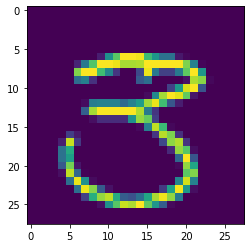

3

In [33]:
plt.imshow(xtrain[7].reshape(28,28))
plt.show()
ytrain[7]

In [34]:
xtrain.shape

(42000, 784)

In [0]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)

In [0]:
from keras import Sequential
from keras.layers import Dense,Dropout

In [40]:
ytrain[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xtrain,ytrain,test_size=0.3,random_state=2)

In [0]:
model=Sequential()
model.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu',input_dim=784))
model.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='softmax'))


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=100,nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 29400 samples, validate on 12600 samples
Epoch 1/100
29400/29400 [==============================] - 2s 56us/step - loss: 0.5849 - acc: 0.8222 - val_loss: 0.2685 - val_acc: 0.9225
Epoch 2/100
29400/29400 [==============================] - 1s 46us/step - loss: 0.2165 - acc: 0.9363 - val_loss: 0.1994 - val_acc: 0.9405
Epoch 3/100
29400/29400 [==============================] - 1s 44us/step - loss: 0.1597 - acc: 0.9532 - val_loss: 0.1810 - val_acc: 0.9444
Epoch 4/100
29400/29400 [==============================] - 1s 42us/step - loss: 0.1299 - acc: 0.9610 - val_loss: 0.1487 - val_acc: 0.9540
Epoch 5/100
29400/29400 [==============================] - 1s 44us/step - loss: 0.1071 - acc: 0.9673 - val_loss: 0.1414 - val_acc: 0.9565
Epoch 6/100
29400/29400 [==============================] - 1s 47us/step - loss: 0.0914 - acc: 0.9721 - val_loss: 0.1413 - val_acc: 0.9577
Epoch 7/100
29400/29400 [==============================] - 1s 43us/step - loss: 0.0788 - acc: 0.9753 - val_loss: 0.1338 - 

In [0]:
prediction=model.predict(test)

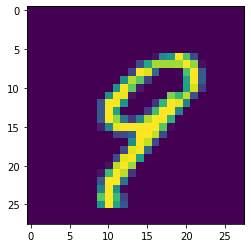

[0.         0.         0.         0.         0.16708285 0.
 0.         0.         0.         4.351582  ]


In [51]:
plt.imshow(test[67].reshape(28,28))
plt.show()
print(prediction[67])

In [57]:
l=list(prediction[0])
print(l)

[0.0, 0.0, 19.04124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [56]:
prediction.shape

(28000, 10)

In [0]:
lt2=[]
x=0.0
ind=0
for i in range(0,len(prediction)):
  lt=[]
  lt=list(prediction[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt2.append(ind)  



In [71]:
lt2

[2,
 0,
 9,
 4,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 9,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 3,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 8,
 4,
 3,
 9,
 7,
 4,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 5,
 5,
 4,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 5,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 5,
 0,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 8,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 5,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 2,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 6,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 2,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 8,


In [0]:
sample=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/sample_submission.csv')

In [73]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [74]:
sample.shape

(28000, 2)

In [0]:
sample.drop('Label',axis=1,inplace=True)

In [0]:
sample['Label']=pd.DataFrame(lt2)

In [77]:
sample.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [0]:
sample.to_csv('mnist_sub_ann3.csv',index=False)